In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.API import update_Cal_IPC
from ATS.general import *
from ATS.QAQC import *

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-25 20:09:11.059710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-25 20:09:11.060562: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
service_id = 'f6194c9524bf455d88cab06703e767a5'

# Update Cal IPC Rating column

<Item title:"SAC_NNIP" type:Feature Layer Collection owner:Anooshi>
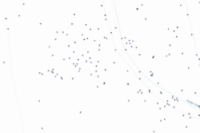

Current Plant Species List file location:
/home/user/SAC/Script Support Files/SAC Master Plant Species List 20191114.xlsx
Current Sheet Name:
Year 5 Plant Species List


Exception: Your request has timed out.
(Error Code: 504)

In [4]:
update_Cal_IPC(service_id,'Cal_IPC_Rating','Species_Sci',layer=0)

# Load and Subset Data

<Item title:"SAC_NNIP" type:Feature Layer Collection owner:Anooshi>
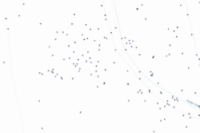

In [5]:
# Load data from arcGIS online for excel export
output = arcGIS_data_load(service_id)

points = output['data0']
management = output['table0']
feature_service = output['feature_service']

In [6]:
# Merge related table and feature layer
data = points.merge(management, left_on='GlobalID', right_on='Ref_to_Points', how='inner')
data = data.drop(columns=['GlobalID_x'])
data = data.rename(columns={'OBJECTID_x':'Point_ObjectID','GlobalID_y':'Record_GlobalID', 'OBJECTID_y':'Record_ObjectID'})

In [7]:
# Subset data for desired year.
data.rename(columns={"Survey_Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 1835


# QAQC

In [8]:
validate_domains(feature_service)



Table/Layer:  NNIP_Management


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Janel Mayo, Richard Graham-Bruno}"
0,Surveyor_2,"{, Janel Mayo, Richard Graham-Bruno}"
0,Cover,"{1-25, , 26-50, 51-75, 0-1}"
0,Herbicide,{}
0,Contrator,{}
0,Treatment_Rec_Action,{}
0,Population_Size,{}




Table/Layer:  NNIP_Mapping


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Jackson Sabol, Joy Stewart, Janel Mayo, Richard Graham-Bruno}"
0,Surveyor_2,"{, Ryan Swanson, Jackson Sabol, Joy Stewart, Janel Mayo, Richard Graham-Bruno}"
0,Phenology,{Unknown}
0,Cover,"{1-25, 26-50, 51-75, Unknown, 0-1, 76-100}"
0,Pop_Size,{Unknown}
0,Patch_Shape,{}
0,Int_Dist,{Unknown}
0,Field_Season,{}




Table/Layer:  NNIP_Monitoring


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Janel Mayo, Richard Graham-Bruno}"
0,Surveyor_2,"{Ryan Swanson, Janel Mayo, Richard Graham-Bruno}"




Table/Layer:  NNIP_Monitoring_Observations


No Mismatches Found


Table/Layer:  Points


The following entries are not within the domain:


,Field,Data
0,Species_Sci,"{, Willow - Tree Protection, Thatch, Salix laevigata, Salix gooddingii, Salix exigua}"
0,Deprecated,{}


In [9]:
QAQC_whitespace(data, exclude_cols=['Comments_y', 'Comments_x'], objectID = ['Record_ObjectID'])



Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Phenology
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Population_Size
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Record_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Ref_to_Points
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Cover_x
No \xa0 characters found
No double spaces found
No triple spaces found
No tr

In [10]:
find_blank_entries(data, exclude_cols=['Surveyor_2','Comments_x','Comments_y','ESRIGNSS_H_RMS','ESRIGNSS_AVG_H_RMS','ESRIGNSS_RECEIVER','Phenology','Cover_x','Cover_y','Herbicide',
                                       'Patch_Size','Treatment_Rec_Action','Treatment_Area','Contrator'])

No blank Surveyor_1
No blank Point_ObjectID
No blank BHR_Site
No blank Record_ObjectID
No blank Observation_Date
Blank Population_Size entrie(s) exist!


,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size
1,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1795,2021-05-05 16:04:42,Kevin Sherrill,None,0-5,NaN,VegetativeAdult,Treatment Action,Other Herbicide,Hanford,25.0,Polaris herbicide.,Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,fb27dabe-d377-435f-b7d3-729166602c04,None
7,3,Lepidium latifolium,None,High,SAC,Deprecated or Merged,Recheck next year.,None,NaN,NaN,"{'x': 6182090.834657813, 'y': 2036215.4317287025, 'spatialReferenc...",961,2020-09-10 17:46:15,Darian Wong,Roger Stephens,None,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,7feb2d00-b0a1-4e2b-8fe1-56ccbb0421a5,c8256f2d-eae2-441d-ad81-18dd451726f2,None
8,4,Lepidium latifolium,29.6875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182112.72642231, 'y': 2036247.3136490583, 'spatialReference...",1797,2021-05-05 16:12:47,Kevin Sherrill,None,None,NaN,VegetativeAdult,Treatment Action,Other Herbicide,Hanford,50.0,Polaris herbicide.,Herbicide,2f4e3d2d-b484-4dc5-8483-5eefe30cac0c,9499c7c2-8d31-4288-af97-3feabd755f7c,None
10,5,Lepidium latifolium,46.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182145.9392823875, 'y': 2036362.8052159697, 'spatialReferen...",1798,2021-05-05 16:21:24,Kevin Sherrill,None,None,NaN,None,Treatment Action,Other Herbicide,Hanford,10.0,Polaris.,Herbicide,619e1d34-7002-4013-8a25-da6a3b75186c,57665aa0-d44f-4adb-95a1-d172a746f300,None
11,5,Lepidium latifolium,46.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182145.9392823875, 'y': 2036362.8052159697, 'spatialReferen...",1952,2021-06-03 17:12:24,Kurt Lutz,None,0-5,NaN,FloweringAdult,Treatment Action,Other Herbicide,Hanford,150.0,Treated with Polaris.,Herbicide,619e1d34-7002-4013-8a25-da6a3b75186c,dd0c77a5-92b9-4666-9f82-a79300cb3f00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,3278,Centaurea solstitialis,None,High,SAC,Active,None,GNSS:97850,NaN,0.807405,"{'x': 6184676.864930276, 'y': 2036854.079936635, 'spatialReference...",2617,2021-08-04 20:55:59,Dana Morawitz,None,0,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,b7d018b6-29b7-4540-a7ef-fd948668e9f2,98d714a0-e29b-42e2-bd9e-4740ac277981,None
3002,3300,Centaurea solstitialis,None,High,SAC,Active,Mapped 08/21,"iPhone12,8",NaN,4.778169,"{'x': 6182316.7386467485, 'y': 2036803.0097380185, 'spatialReferen...",2576,2021-08-05 20:57:43,Roger Stephens,None,None,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,934852b6-5e0c-4451-89f2-251d26d686a3,a52cc0af-4513-4ba5-b09b-c662fcfc3234,None
3015,3309,Dittrichia graveolens,None,Moderate,SAC,Deprecated or Merged,"Mapped w IPhone in 08/21, deprecated in favor of polygon 09/21","iPhone12,8",NaN,4.941291,"{'x': 6184537.9061946105, 'y': 2037114.3515864897, 'spatialReferen...",2701,2021-08-20 20:53:07,Other,None,None,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,c112bc5f-d40e-49f9-8de0-4d9e493239fc,c70cfb50-07cd-409f-a49d-f13de3a4b089,None
3086,3385,Dittrichia graveolens,None,Moderate,SAC,Active,"Mapped 08/21. E side of streambed, up and downstream of barbed wi...",None,NaN,NaN,"{'x': 6183272.878057714, 'y': 2033414.929193884, 'spatialReference...",3015,2021-09-03 18:58:59,Niel Gapal,Dana Morawitz,0,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,6310d9fb-53bf-4f26-8745-ac69b00b6f79,dbb18b24-3204-4342-a9eb-ee056cf187b0,None


No blank Species_Sci
No blank SHAPE
No blank Record_GlobalID
No blank Cal_IPC_Rating
No blank Ref_to_Points
No blank Type
No blank Deprecated


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


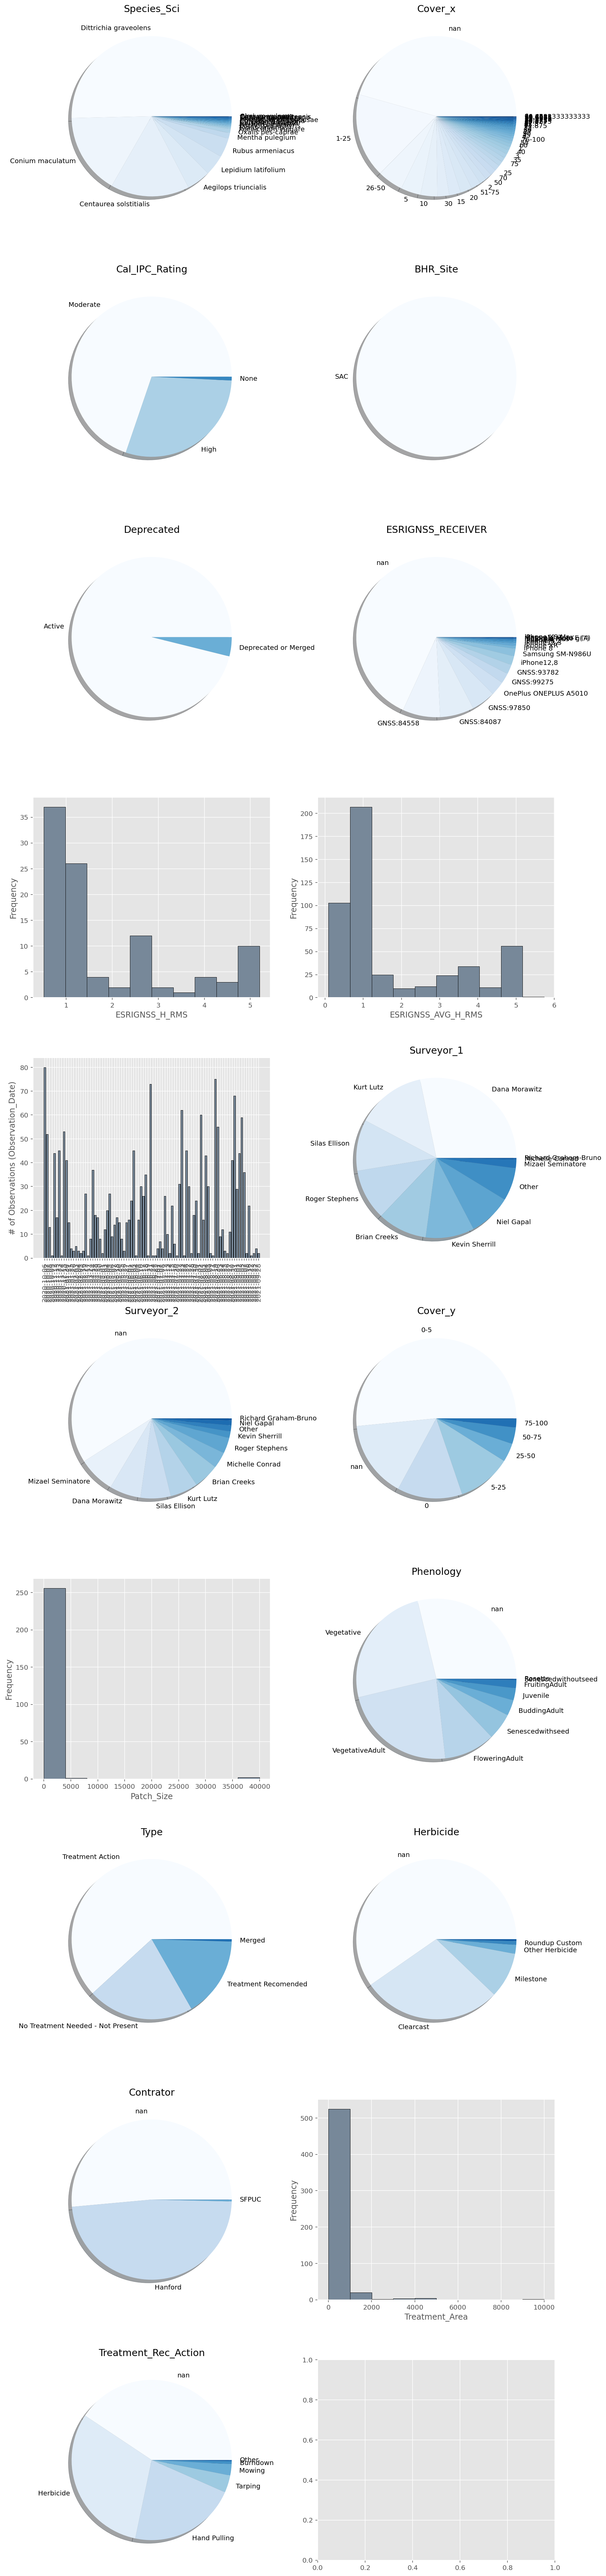

In [11]:
QAQC_plot(sub, ['Species_Sci', 'Cover_x', 'Cal_IPC_Rating', 'BHR_Site', 'Deprecated',
       'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS',
       'ESRIGNSS_AVG_H_RMS', 'Observation_Date',
       'Surveyor_1', 'Surveyor_2', 'Cover_y', 'Patch_Size', 'Phenology',
       'Type', 'Herbicide', 'Contrator', 'Treatment_Area', 
       'Treatment_Rec_Action'])

Patch_Size  Outlier: True
See Outlier Entries Below:


,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size,Patch_Size_Outlier
368,338,Dittrichia graveolens,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6184596.678803474, 'y': 2037201.193631068, 'spatialReference...",2267,2021-07-22 17:10:10,Brian Creeks,Dana Morawitz,0-5,800.0,Vegetative,Treatment Action,Clearcast,Hanford,6.0,None,Herbicide,b100354e-de1c-467f-a4f2-9ccf2fba4fbc,b49836e9-c13c-41aa-be43-64addbe22da4,11-50,True
408,357,Dittrichia graveolens,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6185201.358568807, 'y': 2037654.9668239576, 'spatialReferenc...",1330,2020-10-06 18:26:21,Roger Stephens,None,5-25,250.0,FloweringAdult,Treatment Action,None,Hanford,50.0,On bank north of SAC and up to slope.,Hand Pulling,ab0f15e4-94f2-4ef3-9a05-8bff9ad8fc5e,652b2f4a-6924-4053-b585-ed9bb974871d,101-200,True
409,357,Dittrichia graveolens,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6185201.358568807, 'y': 2037654.9668239576, 'spatialReferenc...",1392,2020-10-07 20:48:18,Kurt Lutz,Brian Creeks,5-25,250.0,FloweringAdult,Treatment Action,None,Hanford,50.0,On bank north of SAC and up to slope.,Hand Pulling,ab0f15e4-94f2-4ef3-9a05-8bff9ad8fc5e,d97d2270-0a90-4ebb-9426-b27fffbf734d,51-100,True
515,387,Dittrichia graveolens,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6190274.180243716, 'y': 2037932.8699892312, 'spatialReferenc...",2657,2021-08-19 18:22:35,Brian Creeks,None,0-5,200.0,VegetativeAdult,Treatment Action,Clearcast,Hanford,8.0,None,Herbicide,3b54a857-88a7-4370-a2fb-c860b49cda1e,77e269dd-9f43-4d21-85e8-99e99d5740e0,11-50,True
565,405,Conium maculatum,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6184538.484366059, 'y': 2037223.3901089728, 'spatialReferenc...",1562,2020-12-15 19:17:04,Roger Stephens,Kurt Lutz,0-5,200.0,Juvenile,Treatment Recomended,None,None,NaN,New sprouts under old stalks. Far enough along to ID. Entire patch...,Herbicide,1efe1368-0c73-4ed8-86b8-210aefb48bfd,c9e5522e-a8cb-49a1-9457-8f09632eab84,51-100,True
772,555,Cynodon dactylon,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182270.590279803, 'y': 2036351.2064858973, 'spatialReferenc...",1454,2020-11-13 17:09:42,Brian Creeks,Kurt Lutz,50-75,900.0,Senescedwithseed,Treatment Recomended,None,None,NaN,Could not map polygon due to lack of R-1 availability.,Herbicide,1da61973-82a7-4557-a1fd-cb1d075eecb7,aec9f6a9-5fb7-4ef2-9718-ee8219a69c76,>1000,True
851,587,Dittrichia graveolens,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6184358.361694798, 'y': 2037042.5978196412, 'spatialReferenc...",2271,2021-07-22 17:29:53,Brian Creeks,None,0-5,800.0,Vegetative,Treatment Action,Clearcast,Hanford,10.0,None,Herbicide,8a03debf-615b-481b-b0e6-59522ee707f2,0aa270f2-c4d5-4798-8c4e-d6f423b30c63,11-50,True
854,589,Lepidium latifolium,1-25,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182941.726732805, 'y': 2037395.673228979, 'spatialReference...",1821,2021-05-05 18:09:54,Kurt Lutz,None,25-50,40000.0,VegetativeAdult,Treatment Action,Milestone,Hanford,5000.0,None,Herbicide,a159d2ba-a9a5-4d94-a19c-695fa78ccccc,6f46ab78-bfd6-49e8-b427-2cc0a2372f55,>1000,True
855,589,Lepidium latifolium,1-25,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182941.726732805, 'y': 2037395.673228979, 'spatialReference...",1965,2021-06-03 18:48:59,Kurt Lutz,None,25-50,40000.0,VegetativeAdult,Treatment Action,Milestone,Hanford,5000.0,None,Herbicide,a159d2ba-a9a5-4d94-a19c-695fa78ccccc,594fe6f2-8f2e-4d14-b3ab-24246802fb2b,>1000,True
1006,805,Dittrichia graveolens,None,Moderate,SAC,Active,On both sides of tributary slope.,None,NaN,NaN,"{'x': 6190715.870926397, 'y': 2037805.3783753216, 'spatialReferenc...",2651,2021-08-19 17:42:51,Brian Creeks,None,0-5,300.0,VegetativeAdult,Treatment Action,Clearcast,Hanford,30.0,N

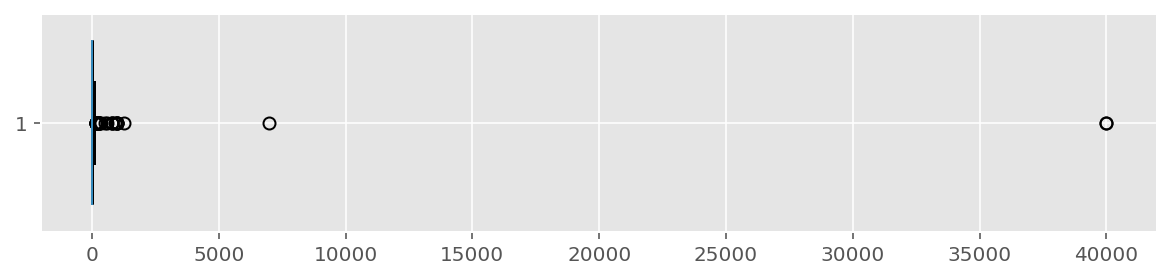

Treatment_Area  Outlier: True
See Outlier Entries Below:


,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size,Patch_Size_Outlier,Treatment_Area_Outlier
11,5,Lepidium latifolium,46.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182145.9392823875, 'y': 2036362.8052159697, 'spatialReferen...",1952,2021-06-03 17:12:24.000000000,Kurt Lutz,None,0-5,NaN,FloweringAdult,Treatment Action,Other Herbicide,Hanford,150.0,Treated with Polaris.,Herbicide,619e1d34-7002-4013-8a25-da6a3b75186c,dd0c77a5-92b9-4666-9f82-a79300cb3f00,None,False,True
23,13,Lepidium latifolium,None,High,SAC,Deprecated or Merged,Merged into larger polygon.,None,NaN,NaN,"{'x': 6182098.1167718535, 'y': 2036665.001662048, 'spatialReferenc...",1958,2021-06-03 17:22:05.000000000,Kurt Lutz,None,0-5,NaN,FloweringAdult,Treatment Action,Other Herbicide,Hanford,200.0,None,Herbicide,0f026542-9ed4-4290-a009-d7b451588adb,c6552f3b-467d-4816-9a73-3d85842e2cec,51-100,False,True
75,108,Conium maculatum,51-75,Moderate,SAC,Active,Location was updated. Point was outside of polygon.,None,NaN,NaN,"{'x': 6183874.789499223, 'y': 2037076.1085793972, 'spatialReferenc...",1753,2021-04-29 20:39:07.000000000,Silas Ellison,None,50-75,NaN,VegetativeAdult,Treatment Action,Milestone,Hanford,1200.0,Large dense patch mixed in with willows,Herbicide,ac4373fb-8268-4bfa-80b5-6ea50d0bd4ac,d8a713e7-9634-4481-a4e2-8ef2e22e0275,>1000,False,True
76,108,Conium maculatum,51-75,Moderate,SAC,Active,Location was updated. Point was outside of polygon.,None,NaN,NaN,"{'x': 6183874.789499223, 'y': 2037076.1085793972, 'spatialReferenc...",1913,2021-06-01 20:38:03.000000000,Kurt Lutz,None,25-50,NaN,FloweringAdult,Treatment Action,Milestone,Hanford,1200.0,Large dense patch mixed in with willows,Herbicide,ac4373fb-8268-4bfa-80b5-6ea50d0bd4ac,b8ac2089-ef8b-41dd-999f-b04827175963,501-1000,False,True
79,109,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6184419.396677718, 'y': 2037089.6597333995, 'spatialReferenc...",1748,2021-04-29 20:21:14.000000000,Silas Ellison,None,25-50,NaN,VegetativeAdult,Treatment Action,Milestone,Hanford,300.0,"Somewhat dense understory, mixed in with Torolis, below willows",Herbicide,4c6e0873-0004-4d24-a58e-c77c09f053f4,e519ccf8-7315-437c-849c-641a37c4435c,201-500,False,True
119,249,Aegilops triuncialis,1-25,High,SAC,Active,None,GNSS:84087,NaN,0.686424,"{'x': 6181467.613211215, 'y': 2036508.4647015631, 'spatialReferenc...",1835,2021-05-07 18:09:04.000000000,Kevin Sherrill,None,0-5,NaN,BuddingAdult,Treatment Action,Roundup Custom,Hanford,490.0,Small buffer treated (past pin flags) to ensure treatment of veget...,Herbicide,92db75be-d250-4558-8d05-db96cdca8fa6,dc8e23b7-7641-433c-adda-233cb609b2d0,None,False,True
131,250,Aegilops triuncialis,1-25,High,SAC,Active,None,None,NaN,NaN,"{'x': 6181572.409589559, 'y': 2036816.4086394757, 'spatialReferenc...",1840,2021-05-07 18:29:21.000000000,Kevin Sherrill,None,None,NaN,None,Treatment Action,Roundup Custom,Hanford,350.0,Small buffer treated (past pin flags) to ensure treatment of veget...,Herbicide,c17ff701-7c15-4fea-b303-835e91aa474f,aeadf84f-38f2-4938-ac25-375f3d2a0ad2,None,False,True
145,252,Aegilops triuncialis,51-75,High,SAC,Active,"Surrounding points merged, this point centered at most dense part ...",GNSS:84087,NaN,0.698357,"{'x': 6181881.71146439, 'y': 2035953.0028859824, 'spatialReference...",1832,2021-05-07 16:56:34.000000000,Kevin Sherrill,None,None,NaN,None,Treatment Action,Roundup Custom,Hanford,4900.0,"Herbicide application with Roundup, backpack sprayers. Small buffe...",Herbicide,65899822-2958-49fa-893c-0b659998727e,8f90009c-422d-490c-b135-93922fc13725,None,False,True
167,260,Centaurea solstitialis,26-50,High,SAC,Active,None,None,NaN,NaN,"{'x': 6181317.368432969, 'y': 2038286.7747932223, 'spatialRe

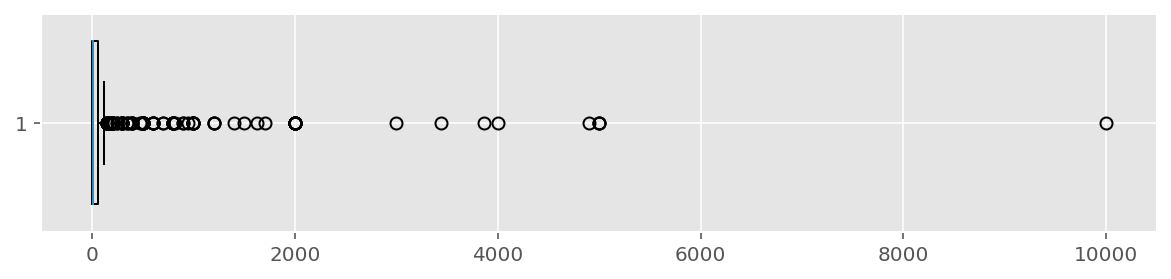

In [13]:
foo = find_outlier(sub, ['Patch_Size', 'Treatment_Area'], boxplot=True)

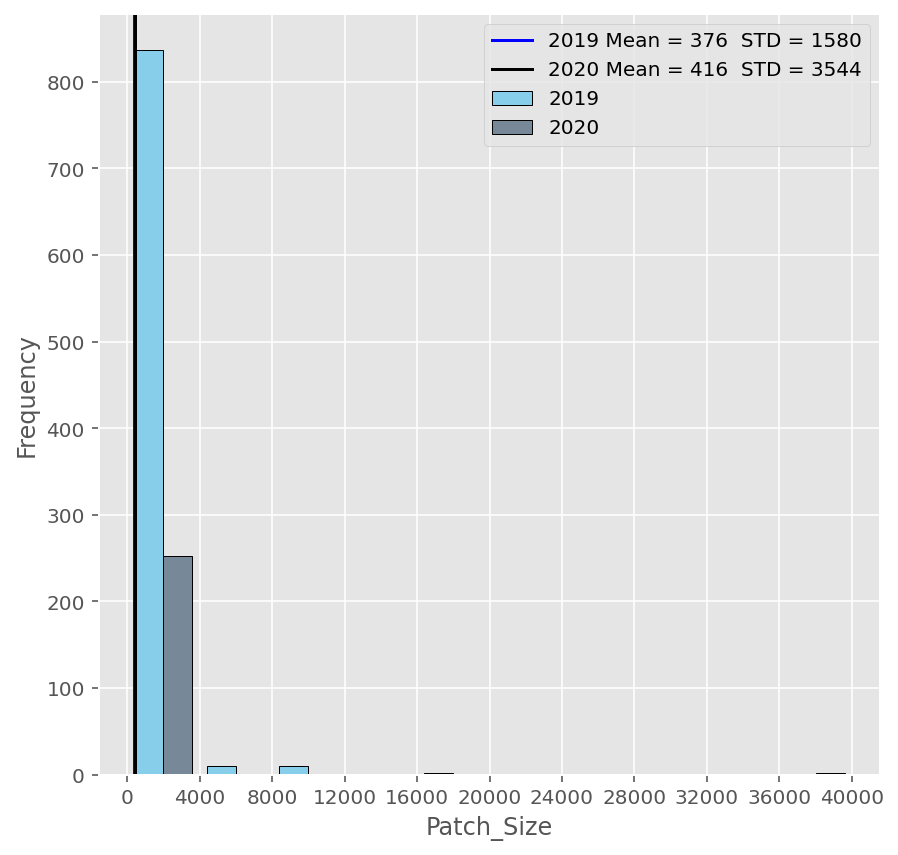

In [15]:
compare_years_continuous(data, 'Patch_Size', '2019','2020',4000)

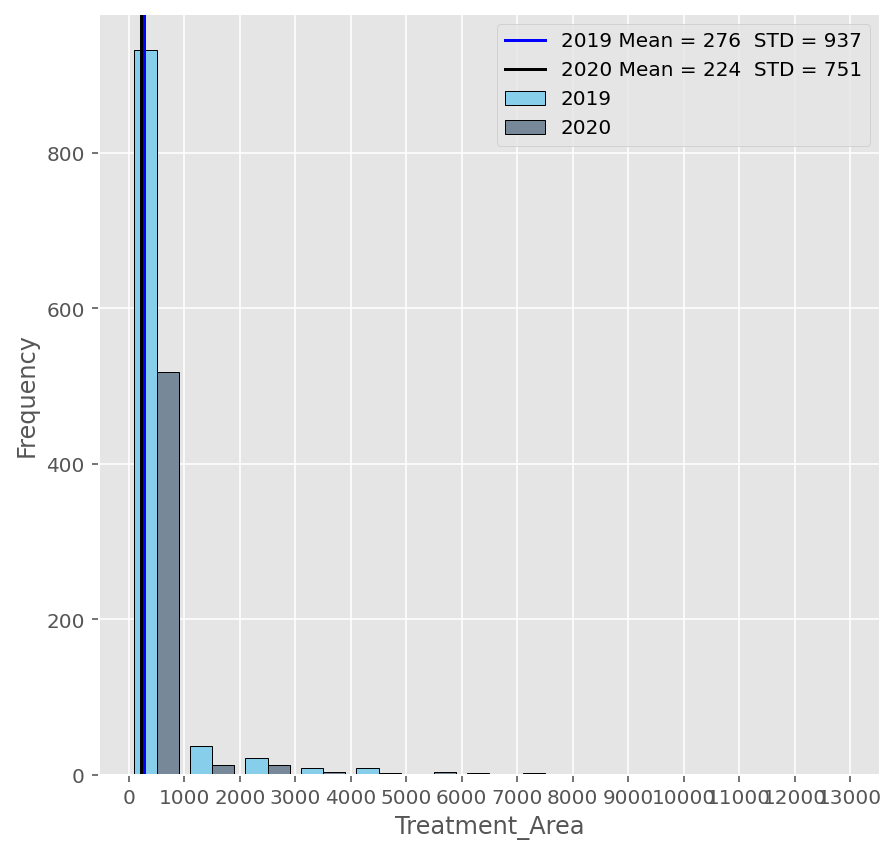

In [16]:
compare_years_continuous(data, 'Treatment_Area', '2019','2020',1000)

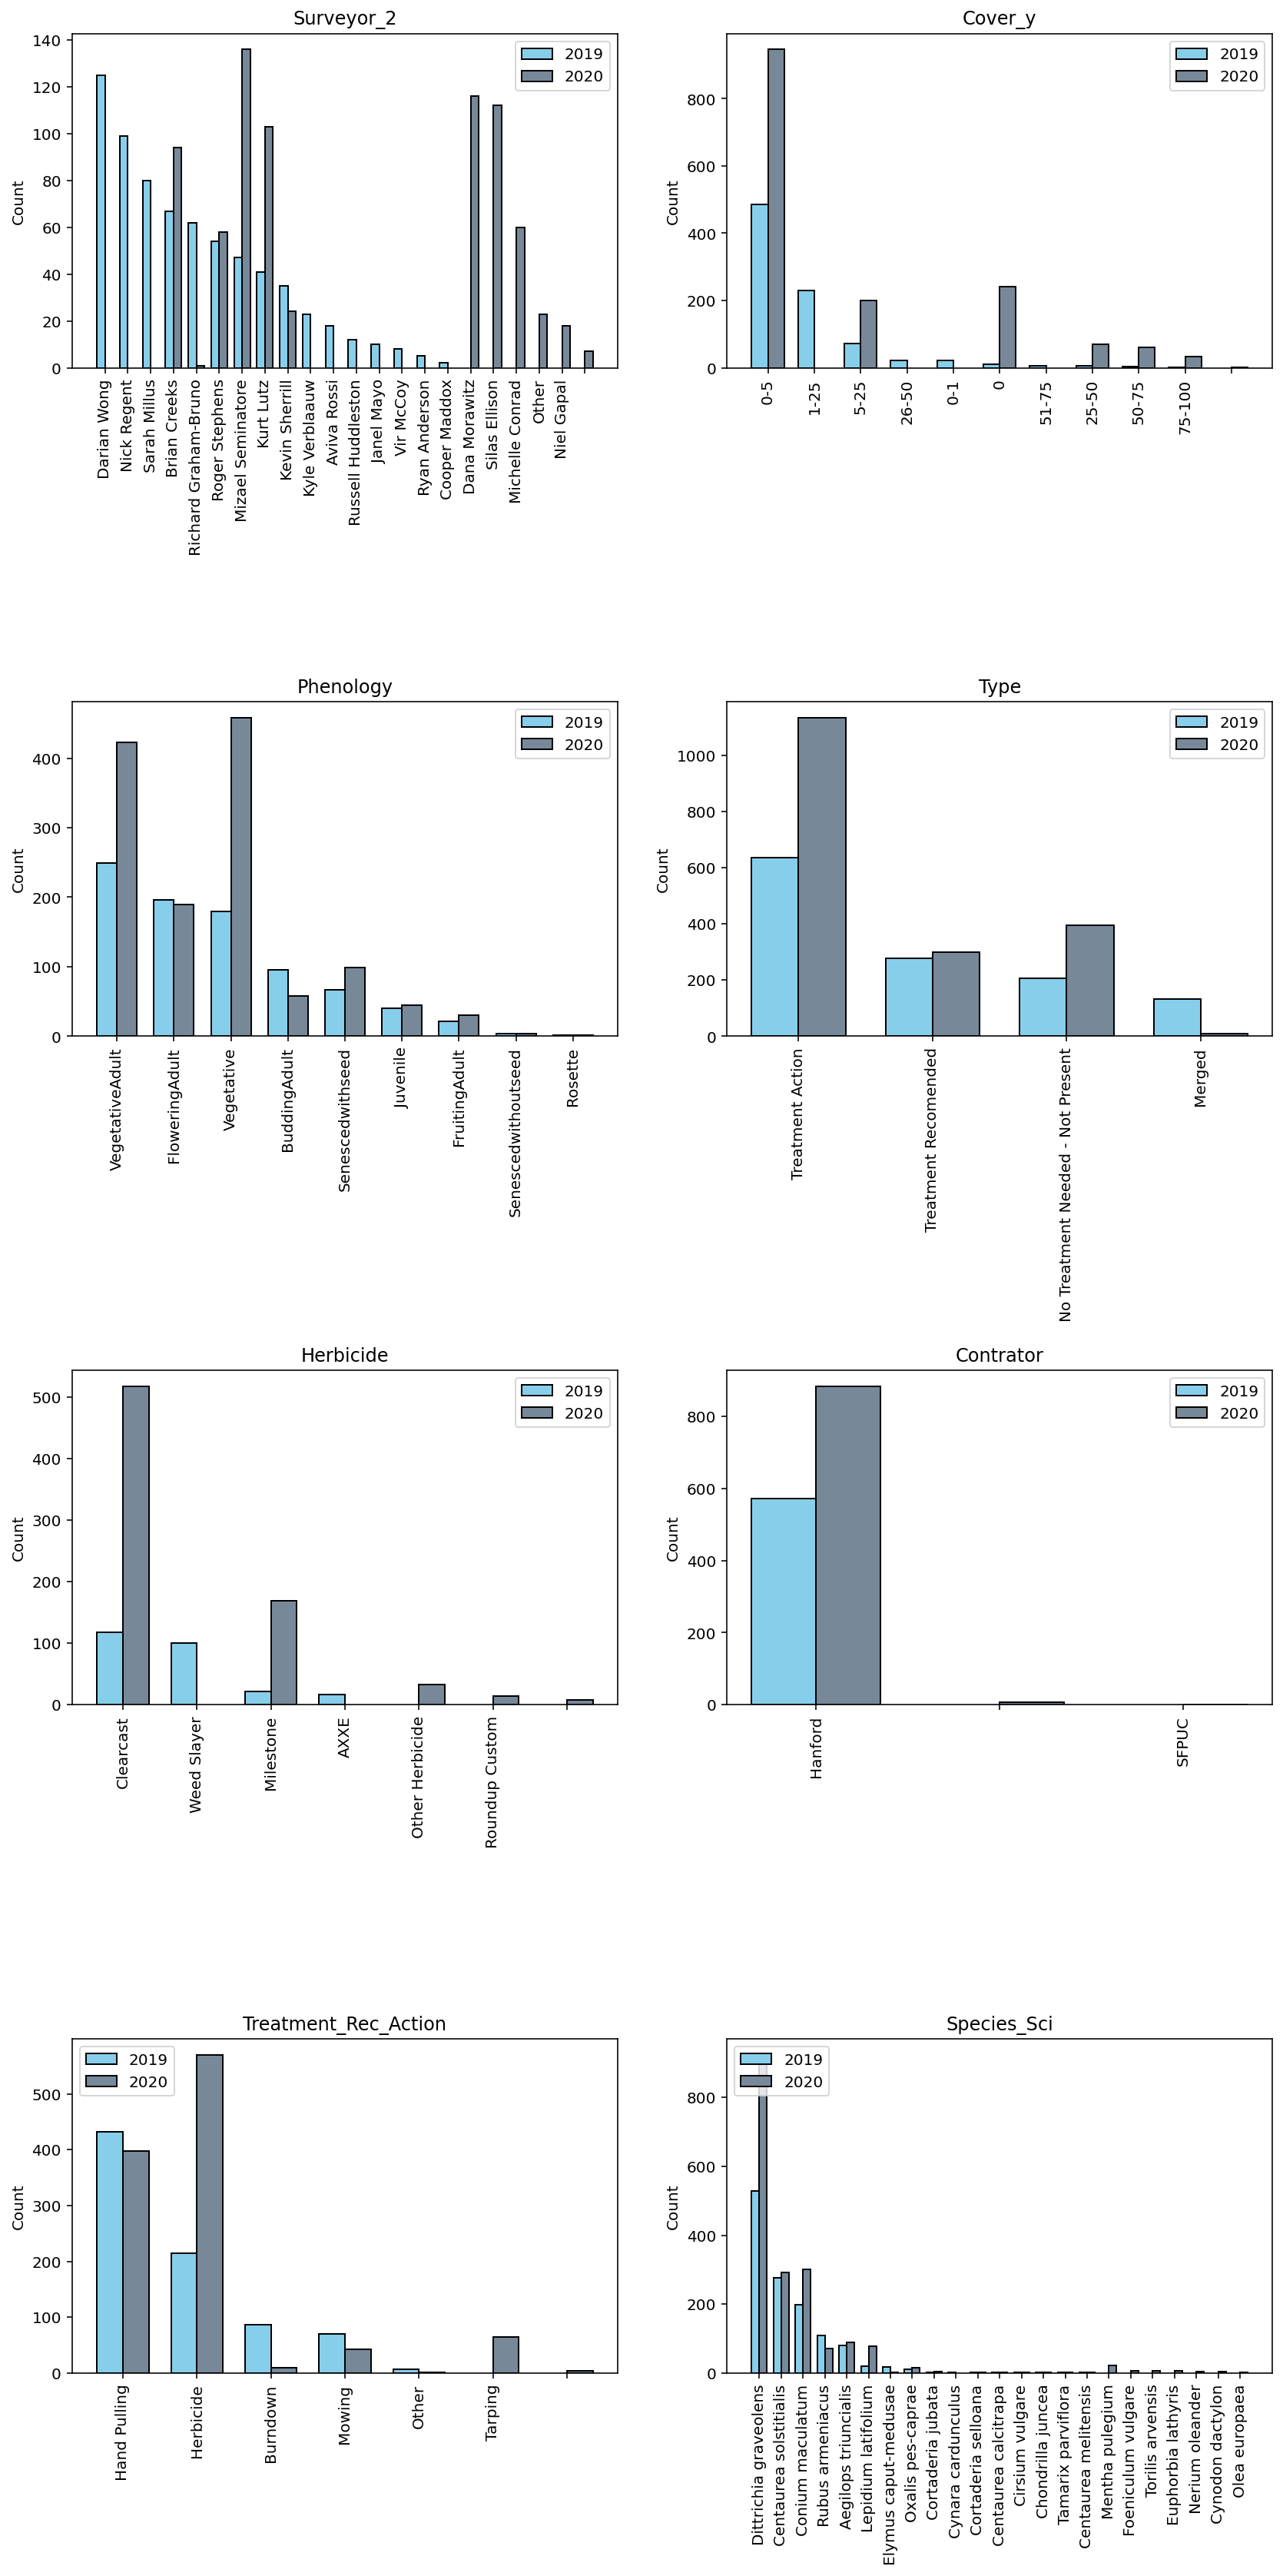

In [14]:
compare_years_catagorical(data,['Surveyor_2','Cover_y','Phenology','Type','Herbicide','Contrator','Treatment_Rec_Action', 'Species_Sci' ],'2019','2020')

Dropping surveyors with less than 90.10000000000001 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Mizael Seminatore' 'Michelle Conrad' 'Richard Graham-Bruno']


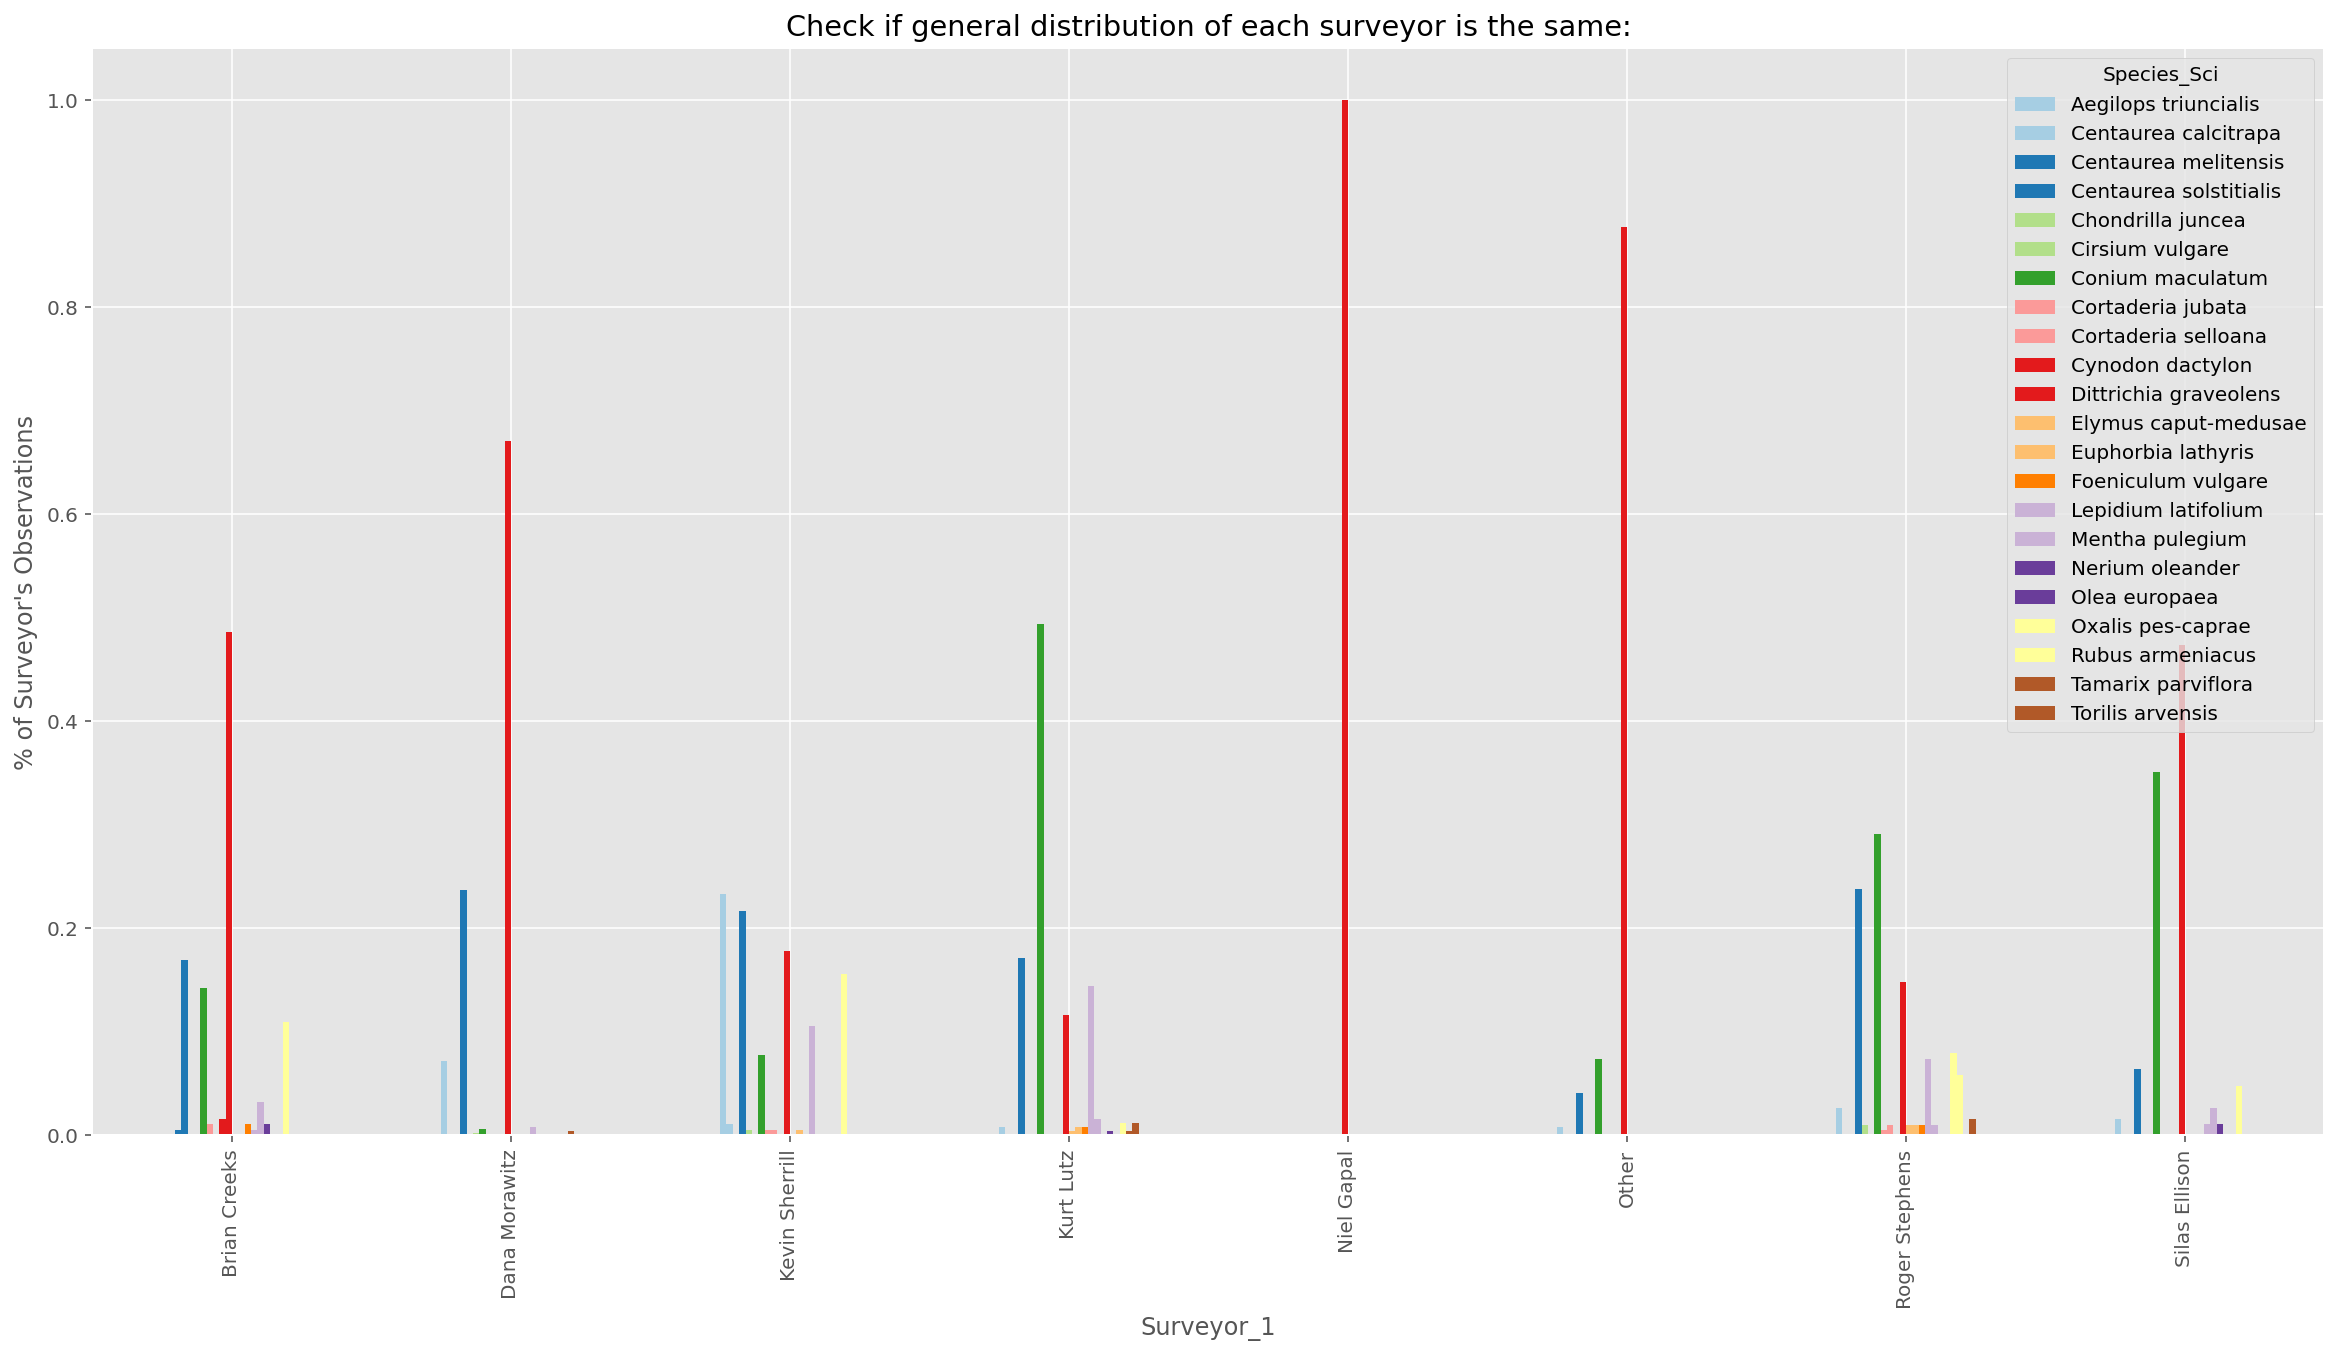

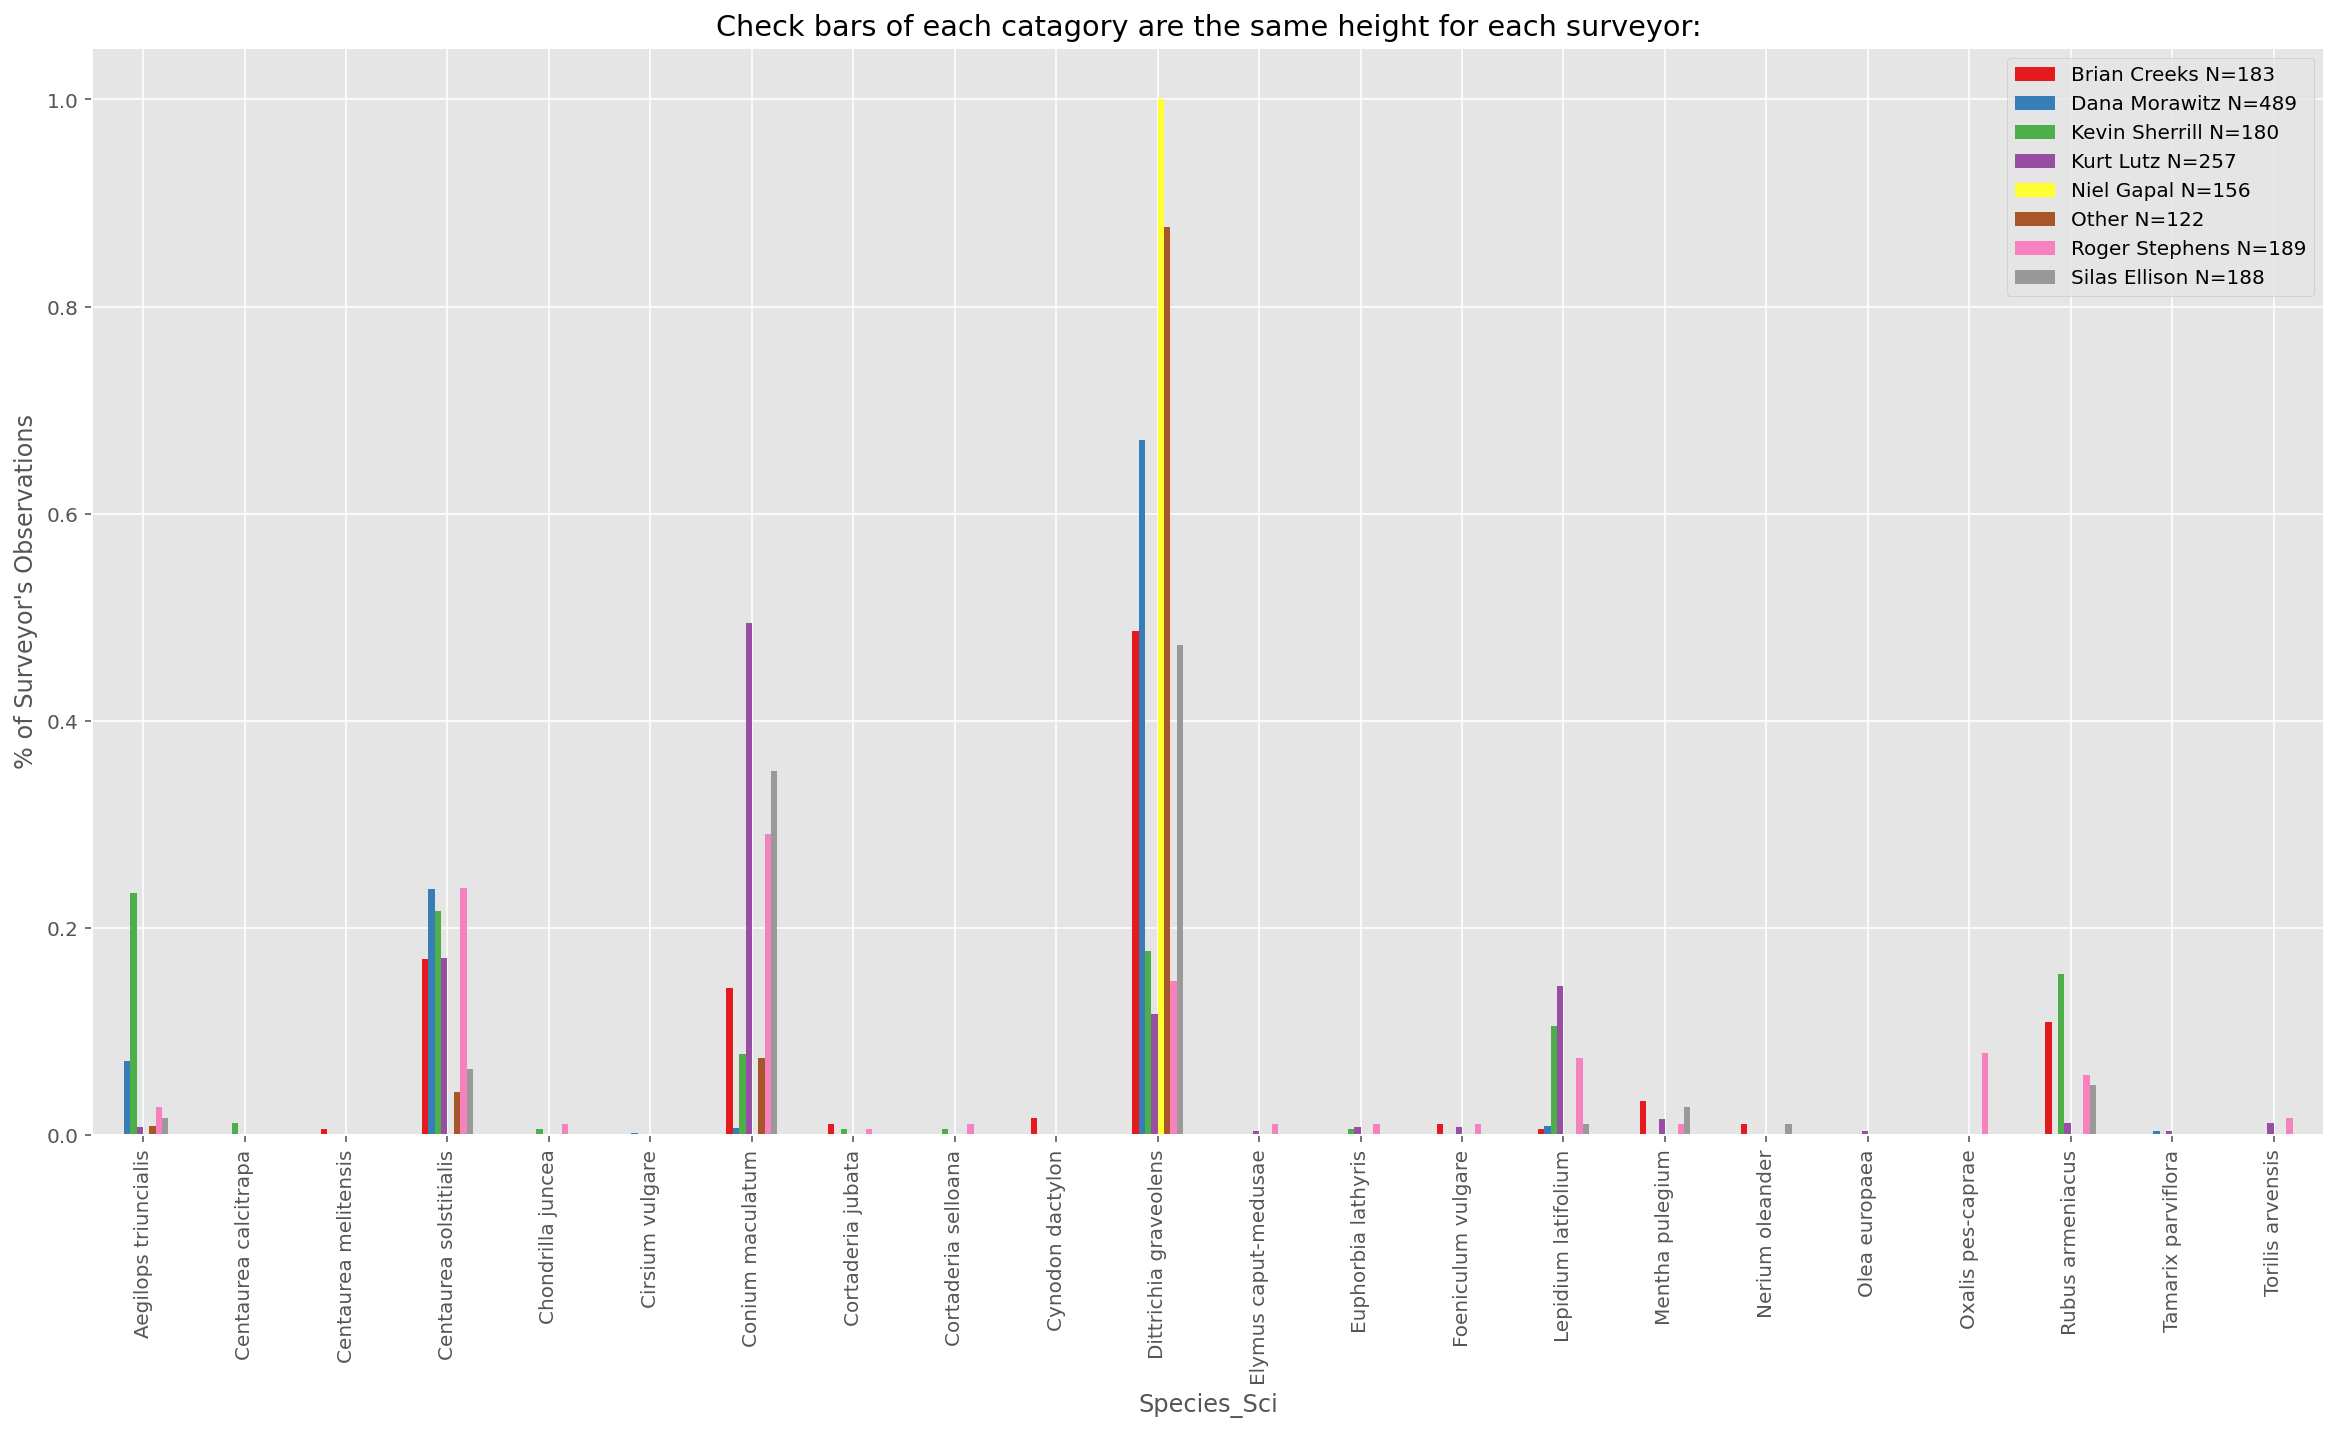

In [18]:
compare_surveyors(sub, 'Species_Sci','Surveyor_1',5)

In [12]:
sub.head()

,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size
0,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1697,2021-04-14 20:21:58,Kurt Lutz,Roger Stephens,5-25,NaN,Vegetative,Treatment Recomended,None,None,NaN,"20% cover, mostly juveniles",Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,d324eddd-bc7e-4bee-a844-b503dc84b138,11-50
1,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1795,2021-05-05 16:04:42,Kevin Sherrill,None,0-5,NaN,VegetativeAdult,Treatment Action,Other Herbicide,Hanford,25.0,Polaris herbicide.,Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,fb27dabe-d377-435f-b7d3-729166602c04,None
2,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1868,2021-05-20 19:48:06,Silas Ellison,None,5-25,NaN,VegetativeAdult,Treatment Recomended,None,None,NaN,"New growth is yellowing, older growth is mostly still green and vi...",Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,a21dc681-f040-46e7-b441-9b7c0273be4d,11-50
3,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1949,2021-06-03 17:03:21,Kurt Lutz,None,0-5,NaN,FloweringAdult,Treatment Action,Milestone,Hanford,NaN,None,Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,7062fdd5-fe33-4e60-a2ef-29b6e6d0edc2,11-50
4,2,Lepidium latifolium,None,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182053.911624985, 'y': 2036047.596228444, 'spatialReference...",1718,2021-04-14 20:21:07,Roger Stephens,Kurt Lutz,0-5,NaN,Vegetative,Treatment Recomended,None,None,NaN,Plants appear less advanced than patches to the north.,Hand Pulling,daf9b7c7-d9d1-4e6b-a4f0-ddcdcd3b3add,d92ed6fb-874f-4bf4-91ea-2a5c6f6703be,11-50


In [20]:
data.Species_Sci.unique()

array(['Lepidium latifolium', 'Centaurea solstitialis',
       'Rubus armeniacus', 'Conium maculatum', 'Dittrichia graveolens',
       'Foeniculum vulgare', 'Elymus caput-medusae', 'Torilis arvensis',
       'Aegilops triuncialis', 'Mentha pulegium', 'Cynodon dactylon',
       'Euphorbia lathyris', 'Cortaderia jubata', 'Oxalis pes-caprae',
       'Cynara cardunculus', 'Centaurea calcitrapa',
       'Cortaderia selloana', 'Nerium oleander', 'Chondrilla juncea',
       'Cirsium vulgare', 'Tamarix parviflora', 'Centaurea melitensis',
       'Olea europaea'], dtype=object)

# Analysis

In [21]:
# Tarping analysis
subB = data.loc[(data.Observation_Date > '2019-10-01') & (data.Species_Sci == 'Conium maculatum'),:]

len(subB)


499

In [22]:
sub.head()

,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size
0,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1697,2021-04-14 20:21:58,Kurt Lutz,Roger Stephens,5-25,NaN,Vegetative,Treatment Recomended,None,None,NaN,"20% cover, mostly juveniles",Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,d324eddd-bc7e-4bee-a844-b503dc84b138,11-50
1,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1795,2021-05-05 16:04:42,Kevin Sherrill,None,0-5,NaN,VegetativeAdult,Treatment Action,Other Herbicide,Hanford,25.0,Polaris herbicide.,Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,fb27dabe-d377-435f-b7d3-729166602c04,None
2,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1868,2021-05-20 19:48:06,Silas Ellison,None,5-25,NaN,VegetativeAdult,Treatment Recomended,None,None,NaN,"New growth is yellowing, older growth is mostly still green and vi...",Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,a21dc681-f040-46e7-b441-9b7c0273be4d,11-50
3,1,Lepidium latifolium,21.875,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182105.840129007, 'y': 2036032.395428712, 'spatialReference...",1949,2021-06-03 17:03:21,Kurt Lutz,None,0-5,NaN,FloweringAdult,Treatment Action,Milestone,Hanford,NaN,None,Herbicide,c64857b5-c3ed-41ce-b6d5-0858fd852c1a,7062fdd5-fe33-4e60-a2ef-29b6e6d0edc2,11-50
4,2,Lepidium latifolium,None,High,SAC,Active,None,None,NaN,NaN,"{'x': 6182053.911624985, 'y': 2036047.596228444, 'spatialReference...",1718,2021-04-14 20:21:07,Roger Stephens,Kurt Lutz,0-5,NaN,Vegetative,Treatment Recomended,None,None,NaN,Plants appear less advanced than patches to the north.,Hand Pulling,daf9b7c7-d9d1-4e6b-a4f0-ddcdcd3b3add,d92ed6fb-874f-4bf4-91ea-2a5c6f6703be,11-50


In [53]:
data.head()

,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size
0,3,Lepidium latifolium,None,High,SAC,Deprecated or Merged,Recheck next year.,None,NaN,NaN,"{'x': 6182090.834657813, 'y': 2036215.4317287025, 'spatialReferenc...",961,2020-09-10 17:46:15,Darian Wong,Roger Stephens,None,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,7feb2d00-b0a1-4e2b-8fe1-56ccbb0421a5,c8256f2d-eae2-441d-ad81-18dd451726f2,None
1,7,Lepidium latifolium,None,High,SAC,Deprecated or Merged,Recheck next year.,None,NaN,NaN,"{'x': 6182236.594350111, 'y': 2035986.6284456935, 'spatialReferenc...",958,2020-09-10 17:11:19,Darian Wong,Roger Stephens,None,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,c72a5dcc-0a97-43cc-ae64-7f4dd474f07c,1ac46d8b-74c4-45e5-a75f-1b163dd35395,None
2,8,Lepidium latifolium,None,High,SAC,Deprecated or Merged,Recheck next year.,None,NaN,NaN,"{'x': 6182306.86375662, 'y': 2036411.2560188137, 'spatialReference...",964,2020-09-10 18:40:20,Darian Wong,Roger Stephens,0,NaN,None,No Treatment Needed - Not Present,None,None,NaN,None,None,72a2ccdf-de91-43e7-9a96-54330f3876be,c729ed96-2aee-486a-bd82-61f5f903358f,None
3,17,Lepidium latifolium,None,High,SAC,Deprecated or Merged,Monitoring data within point,None,NaN,NaN,"{'x': 6181887.403741213, 'y': 2036678.8911365508, 'spatialReferenc...",1014,2020-09-15 18:17:13,Roger Stephens,Richard Graham-Bruno,None,NaN,None,Merged,None,None,NaN,Merged with nearby point.,None,a067a3ce-521a-4098-a7bb-365c977a4a73,01165b0f-89e7-4b95-89b1-10fc8feab74e,None
4,19,Lepidium latifolium,None,High,SAC,Deprecated or Merged,None,None,NaN,NaN,"{'x': 6181808.2946361415, 'y': 2037124.4470272912, 'spatialReferen...",1016,2020-09-15 20:14:31,Roger Stephens,Richard Graham-Bruno,None,NaN,None,No Treatment Needed - Not Present,None,None,NaN,Recheck next year,None,ff4f601b-29ab-4b51-be72-d080d0420e95,2639e10d-3e17-4692-822a-108450264d08,None


<ipython-input-24-ccc560f8f382>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COMAtime[col] = COMAtime.loc[:,col].replace({


<AxesSubplot:xlabel='Observation_Date', ylabel='Phenology'>

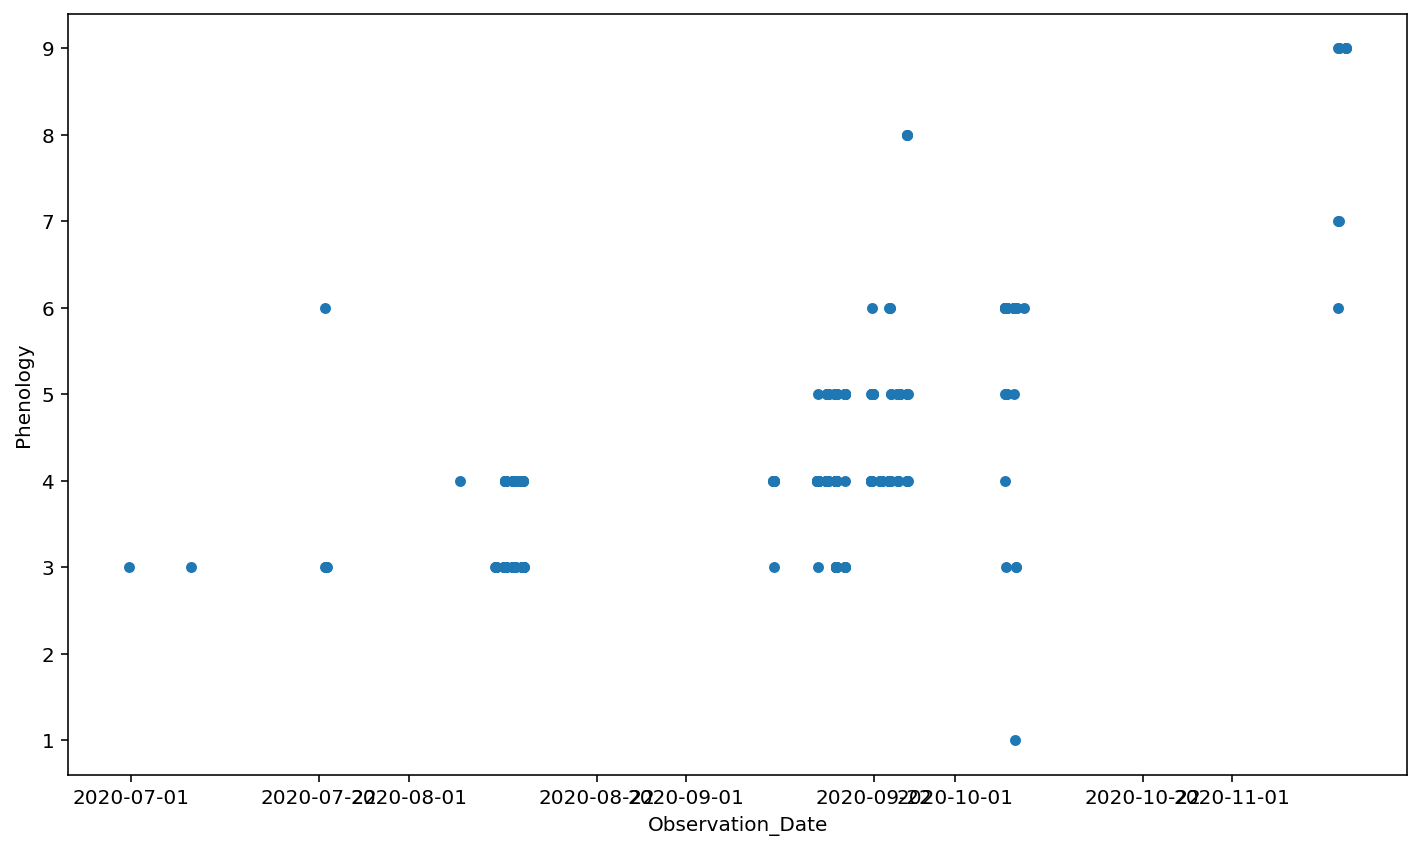

In [24]:
#timeline of various plant stages across time
#assign number values to various stages, assign a threshold of "Too Late" to plants that have reached senescence/seed bank contribution
#key:
    #1 = "New plant that has more than 2 leaves not counting codelydons"
    #2 = "Applicable to plants that start as a basal rosette"
    #3 = "Stage between juvenile and adult"
    #4 = "Adult before flowers or fruits"
    #5 = "Adult with buds not blooming"
    #6 = "Adult with flowers"
    #7 = "Adult with fruits"
    #8 = "Plant dying or nearing the end of its cycle that did not produce seeds after flowering or fruiting"
    #9 = "Plant dying or nearing the end of its cycle that did produce seeds"

    
    
DIGRtime = data.loc[(data.Species_Sci == 'Dittrichia graveolens')]

for col in ['Phenology']:
    if col in ['Phenology']:
        DIGRtime[col] = DIGRtime.loc[:,col].replace({
                'Juvenile':1, 
                'Rosette':2,
                'Vegetative':3,
                'VegetativeAdult':4,
                'BuddingAdult':5,
                'FloweringAdult':6,
                'FruitingAdult':7,
                'Senescedwithoutseed':8,
                'Senescedwithseed':9,
                None:np.nan})

DIGRtime.plot.scatter('Observation_Date','Phenology')

# horizontal line indicating the threshold


In [55]:
COMAtime

,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size
16,77,Conium maculatum,1-25,Moderate,SAC,Deprecated or Merged,None,None,NaN,NaN,"{'x': 6189872.38347514, 'y': 2037643.454229474, 'spatialReference'...",203,2020-02-29 06:47:10.006000128,Richard Graham-Bruno,None,None,NaN,NaN,Merged,None,None,NaN,None,None,71c525ec-f4b1-4991-ae14-b1c30242b6f1,f7be87a6-0b50-43b7-8f83-00441ca4a105,None
17,78,Conium maculatum,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6189912.22853981, 'y': 2037652.980457142, 'spatialReference'...",84,2020-01-30 04:28:03.000000000,Kevin Sherrill,Janel Mayo,1-25,2029.0,1.0,Treatment Recomended,None,None,NaN,Less than 1% cover. Mapped early.,None,b2479472-f849-4cab-a6bc-a96d83476eef,72ed95b4-5e3d-49b0-bbf5-0094b1142ff2,None
18,78,Conium maculatum,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6189912.22853981, 'y': 2037652.980457142, 'spatialReference'...",253,2020-05-04 17:58:41.000000000,Richard Graham-Bruno,None,1-25,NaN,3.0,Treatment Action,None,Hanford,40.0,Sparsely distributes beneath oak canopy,Mowing,b2479472-f849-4cab-a6bc-a96d83476eef,6c5c9d98-aad4-4737-8c5f-f880fa0ff048,None
19,78,Conium maculatum,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6189912.22853981, 'y': 2037652.980457142, 'spatialReference'...",565,2020-07-21 20:09:05.332999936,Roger Stephens,None,1-25,2029.0,3.0,Treatment Recomended,None,None,NaN,Moderate treatment effectiveness. Low cover around QULO. 1 resprou...,Mowing,b2479472-f849-4cab-a6bc-a96d83476eef,4acf0a99-55c1-41a9-a65a-e51a153b9d46,None
20,78,Conium maculatum,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6189912.22853981, 'y': 2037652.980457142, 'spatialReference'...",1578,2021-01-20 20:27:05.000000000,Roger Stephens,None,0-5,NaN,3.0,Treatment Recomended,None,None,NaN,One mature leaves COMA.,Hand Pulling,b2479472-f849-4cab-a6bc-a96d83476eef,80af7e5d-c39d-4ef7-bcb4-1582c3e44369,1-10
24,81,Conium maculatum,1-25,Moderate,SAC,Deprecated or Merged,None,None,NaN,NaN,"{'x': 6190023.219459549, 'y': 2037666.079184234, 'spatialReference...",43,2020-01-23 06:10:46.000000000,Nick Regent,None,None,NaN,1.0,No Treatment Needed - Not Present,None,None,NaN,"Could not accurately identify present plant as COMA, might be Torr...",None,5bb32781-39d7-4c85-aeac-190030bea19d,6e130b82-fc04-442c-8534-8b6b22d55ba8,None
26,102,Conium maculatum,1-25,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6183564.276668802, 'y': 2037566.7178343984, 'spatialReferenc...",1546,2020-12-15 20:02:13.000000000,Kurt Lutz,Roger Stephens,0,NaN,NaN,No Treatment Needed - Not Present,None,None,NaN,"Dead stalks seen, but no sprouts.",None,7973e159-e2c6-460e-b1e8-f212382c71a2,a7a44bbb-815b-4ccf-b2ec-43bc5c43da35,None
27,108,Conium maculatum,51-75,Moderate,SAC,Active,Location was updated. Point was outside of polygon.,None,NaN,NaN,"{'x': 6183874.789499223, 'y': 2037076.1085793972, 'spatialReferenc...",235,2020-03-12 23:44:00.000000000,Richard Graham-Bruno,Mizael Seminatore,51-75,NaN,3.0,Treatment Recomended,None,None,NaN,Plants growing under willows SALLAE and mulefat BACSAL. Patches ar...,Mowing,ac4373fb-8268-4bfa-80b5-6ea50d0bd4ac,a1546562-cff9-47d6-9980-a0c3d4dfd84f,None
28,108,Conium maculatum,51-75,Moderate,SAC,Active,Location was updated. Point was outside of polygon.,None,NaN,NaN,"{'x': 6183874.789499223, 'y': 2037076.1085793972, 'spatialReferenc...",248,2020-04-28 18:29:37.000000000,Kevin Sherrill,None,26-50,NaN,4.0,Treatment Recomended,None,None,NaN,"Many plants now bolting, very few buds present and none flowering....",Mowing,ac4373fb-8268-4bfa-80b5-6ea50d0bd4ac,2b106b3f-9f5d-43f8-8dbd-3f0020126384,None
29,108,Conium maculatum,51-75,Moderate,SAC,Active,Location was updated. Point was outside of polygon.,None,NaN,NaN,"{'x':

In [19]:
out = subB.loc[subB.Comments_y.str.contains("tarp", na=False),:]

In [20]:
out.to_csv('tarping.csv')

In [21]:
out

,Point_ObjectID,Species_Sci,Cover_x,Cal_IPC_Rating,BHR_Site,Deprecated,Comments_x,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Cover_y,Patch_Size,Phenology,Type,Herbicide,Contrator,Treatment_Area,Comments_y,Treatment_Rec_Action,Ref_to_Points,Record_GlobalID,Population_Size
131,291,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182031.629976182, 'y': 2037160.5367262135, 'spatialReferenc...",1514,2020-11-23 19:53:22,Kurt Lutz,None,5-25,NaN,Senescedwithseed,Treatment Recomended,None,None,NaN,Lots of woody debris for SSS dispersal in this patch. Could be goo...,Tarping,05f653ed-9274-4e5e-bfda-321a38b24165,bc36f7c2-74ea-4553-a8b1-d98ddf1975b0,None
133,291,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182031.629976182, 'y': 2037160.5367262135, 'spatialReferenc...",1621,2021-01-21 18:13:22,Kurt Lutz,Silas Ellison,50-75,NaN,None,Treatment Recomended,None,None,NaN,"Not recommended for tarping. Too many woody debris, burrows, and s...",None,05f653ed-9274-4e5e-bfda-321a38b24165,e6003373-e2eb-460d-a3aa-7084f8685a2a,None
136,292,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182053.108431309, 'y': 2037070.9616080672, 'spatialReferenc...",1515,2020-11-23 19:55:17,Kurt Lutz,None,5-25,NaN,Senescedwithseed,Treatment Recomended,None,None,NaN,Lots of woody debris for SSS dispersal in this patch. Could be goo...,Tarping,e43a3c05-dfbb-468c-8e6f-7fee2cf98294,acb20cd3-4da8-4759-ac80-e498daeb67f7,None
138,292,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182053.108431309, 'y': 2037070.9616080672, 'spatialReferenc...",1620,2021-01-21 18:10:05,Kurt Lutz,Silas Ellison,25-50,NaN,None,Treatment Recomended,None,None,NaN,Don’t tarp here; COMA is too scattered.,None,e43a3c05-dfbb-468c-8e6f-7fee2cf98294,30940c53-98d5-49df-ab57-b1bb32f0b4c0,None
346,419,Conium maculatum,51-75,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6184229.932817802, 'y': 2036865.805194229, 'spatialReference...",1564,2020-12-15 19:32:21,Roger Stephens,None,0-5,NaN,Juvenile,Treatment Recomended,None,None,NaN,"Some new sprouts present, sparsely mixed in with older stalks. Pos...",Herbicide,f3d59e71-685c-41ca-b33d-f93d36fbaa17,04411601-7880-474c-96d9-c5a45b784106,51-100
382,462,Conium maculatum,76-100,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6181797.799558714, 'y': 2036716.2539841384, 'spatialReferenc...",1480,2020-11-23 19:25:18,Silas Ellison,None,5-25,NaN,Senescedwithseed,Treatment Recomended,None,None,NaN,"Mostly under/near dead willow branch. Most plants still have seed,...",Tarping,ba59b5e8-b03b-49e2-ba9c-04cc1f66e949,3cb74b34-f63c-4f3f-aff0-75af6de0984f,51-100
385,462,Conium maculatum,76-100,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6181797.799558714, 'y': 2036716.2539841384, 'spatialReferenc...",1615,2021-01-21 19:53:40,Silas Ellison,None,None,NaN,None,Treatment Recomended,None,None,NaN,Dense area of seedlings under willow branches. Might be challengin...,Tarping,ba59b5e8-b03b-49e2-ba9c-04cc1f66e949,84273a23-1014-4347-bcda-7eb7af72a2a0,None
475,558,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182293.585119708, 'y': 2035999.1883995277, 'spatialReferenc...",1500,2020-11-23 17:29:35,Kurt Lutz,None,50-75,NaN,Senescedwithseed,Treatment Recomended,None,None,NaN,Surveying for potential tarping; patch should be tarped over. Cut ...,Tarping,4d015223-ecaa-401a-baec-44316983590b,036f508a-c924-4237-804f-1b2761293acc,None
478,558,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182293.585119708, 'y': 2035999.1883995277, 'spatialReferenc...",1617,2021-01-21 16:40:42,Kurt Lutz,Silas Ellison,50-75,NaN,Senescedwithseed,Treatment Recomended,None,None,NaN,"CAPY and COMA skeletons with seeds. Should be laid down, not mowed...",Tarping,4d015223-ecaa-401a-baec-44316983590b,f8ba19eb-ba19-4977-a6c9-538447e3184f,201-500
481,560,Conium maculatum,26-50,Moderate,SAC,Active,None,None,NaN,NaN,"{'x': 6182300.0

# Export data deliverable

In [13]:
data.columns

Index(['Point_ObjectID', 'Species_Sci', 'Cover_x', 'Cal_IPC_Rating',
       'BHR_Site', 'Deprecated', 'Comments_x', 'ESRIGNSS_RECEIVER',
       'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS', 'SHAPE', 'Record_ObjectID',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Cover_y', 'Patch_Size',
       'Phenology', 'Type', 'Herbicide', 'Contrator', 'Treatment_Area',
       'Comments_y', 'Treatment_Rec_Action', 'Ref_to_Points',
       'Record_GlobalID', 'Population_Size'],
      dtype='object')

In [33]:
data = data.rename(columns={'PointID':'Point ID','RecordID':'Record ID','RecordGlobalID':'Record Global ID'})

In [14]:
field_order = [
    'BHR_Site',
    'Species_Sci',
    'Cal_IPC_Rating',
    'Deprecated',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Cover_x',
    'Cover_y',
    'Patch_Size',
    'Phenology',
    'Type',
    'Herbicide',
    'Contrator',
    'Treatment_Area',
    'Population_Size',
    'Treatment_Rec_Action',
    'Comments_x',
    'Comments_y',
    'ESRIGNSS_RECEIVER',
    'ESRIGNSS_H_RMS',
    'ESRIGNSS_AVG_H_RMS',
    'SHAPE',
    'Record_ObjectID',
    'Point_ObjectID',
    'Ref_to_Points',
    'Record_GlobalID'
]

In [16]:
export_data_deliverable(data, feature_service, field_order, file_name='NNIP_Management')

Exported to Outputs/NNIP_Management_Data_20211026.xlsx
